In [1]:
import geopandas as gpd
from collections import Counter
import matplotlib.pyplot as plt

***

non-unique edge ids (failing assertion in generate-input.py at line 327)

In [2]:
edges = gpd.read_file("./input-for-bike-node-planner/network/raw/edges.gpkg")

In [3]:
edges.head()

,gml_id,temakode,temanavn,objekt_id,versions_id,timePosition,oprettet|timePosition,cvr_kode,cvr_navn,kommunekode,...,planstatus_kode,planstatus,length,privatenot,surfacenot,onewaynot,noegle,note,link,geometry
0,fkg.t_5609_cykelknudepunktsstraekninger.dff11c...,5609,t_5609_cykelknudepunktsstraekninger_t,dff11cbe-dfb5-11ee-b4c6-d94919180272,0eddb6a0-1994-11ef-8aa0-a34fefefbaf3,2024-05-24T06:08:12Z,2024-03-11T13:45:58Z,29188475,Faxe Kommune,320,...,1,Eksisterende,3.234614,True,False,False,None,None,None,"LINESTRING (687723.93 6125144.74, 687723.89 61..."
1,fkg.t_5609_cykelknudepunktsstraekninger.e05115...,5609,t_5609_cykelknudepunktsstraekninger_t,e0511542-dfb5-11ee-b4c6-d94919180272,0ede73d8-1994-11ef-8aa0-a34fefefbaf3,2024-05-24T06:08:12Z,2024-03-11T13:45:58Z,29188475,Faxe Kommune,320,...,1,Eksisterende,5.411359,True,True,False,None,None,None,"LINESTRING (684083.41 6138128.54, 684094.12 61..."
2,fkg.t_5609_cykelknudepunktsstraekninger.d39d9a...,5609,t_5609_cykelknudepunktsstraekninger_t,d39d9afa-dfb5-11ee-b4c6-d94919180272,0ee91982-1994-11ef-8aa0-a34fefefbaf3,2024-05-24T06:08:12Z,2024-03-11T13:45:58Z,29188475,Faxe Kommune,320,...,1,Eksisterende,0.698175,True,False,True,None,None,None,"LINESTRING (687649.8 6135313.88, 687656.46 613..."
3,fkg.t_5609_cykelknudepunktsstraekninger.fb67ec...,5609,t_5609_cykelknudepunktsstraekninger_t,fb67ecf2-dfb5-11ee-b4c6-d94919180272,0f61a316-1994-11ef-8aa0-a34fefefbaf3,2024-05-24T06:08:12Z,2024-03-11T13:45:58Z,29188475,Faxe Kommune,320,...,1,Eksisterende,0.340108,False,False,True,None,None,None,"LINESTRING (702622.65 6133804.55, 702618.96 61..."
4,fkg.t_5609_cykelknudepunktsstraekninger.fbcfcd...,5609,t_5609_cykelknudepunktsstraekninger_t,fbcfcdf4-dfb5-11ee-b4c6-d94919180272,114ffe52-1994-11ef-8aa0-a34fefefbaf3,2024-05-24T06:08:12Z,2024-03-11T13:45:58Z,29188475,Faxe Kommune,320,...,1,Eksisterende,0.203109,False,False,False,None,None,None,"LINESTRING (704840.05 6127463.55, 704843.76 61..."


In [4]:
edges_studyarea = edges.copy()
edges_studyarea["edge_id"] = edges_studyarea.id_cykelknudepunktsstraekning
assert len(edges_studyarea) == len(
    edges_studyarea["edge_id"].unique()
), "Edge ids are not unique"


In [5]:
from collections import Counter
[k for k, v in Counter(edges_studyarea.edge_id).items() if v > 1]

[]

/var/folders/66/3jkth_7d5gggg6pyr8yywwt40000gn/T/ipykernel_76160/2378475154.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  edges[edges.id_cykelknudepunktsstraekning == 'XY1000'].plot(ax=ax, color = "red")


<Axes: >

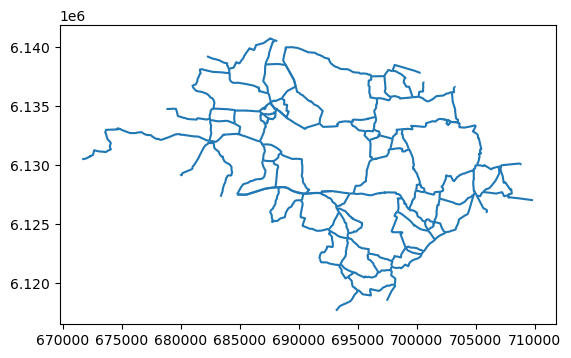

In [6]:
fig, ax = plt.subplots(1,1)
edges.plot(ax=ax)
edges[edges.id_cykelknudepunktsstraekning == 'XY1000'].plot(ax=ax, color = "red")

***

overlapping polygons

<Axes: >

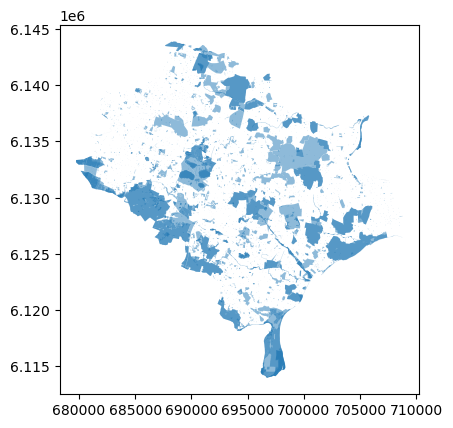

In [7]:
gdf = gpd.read_file("./input-for-bike-node-planner/polygon/nature.gpkg")
gdf.plot(alpha = 0.5)

In [12]:
%%timeit
gdf.unary_union

<magic-timeit>:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.


1.53 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
gdf.union_all()

1.53 s ± 50.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
gpd.__version__

'0.14.0'

In [16]:
len(gdf)

6742

In [27]:
geoms = gdf[["geometry"]].dissolve().explode(index_parts=False).reset_index(drop=True).geometry

<Axes: >

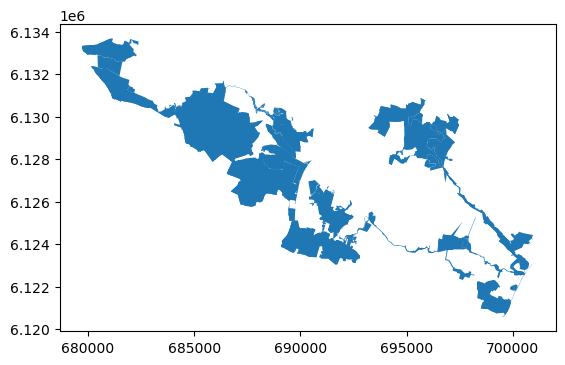

In [40]:
gdf.iloc[gdf.sindex.query(geoms[0], predicate="intersects")].plot()

In [38]:
geoms.apply(lambda x: gdf.iloc[gdf.sindex.query(x, predicate="intersects")])
# q[0] ... geoms indeces
# q[1] ... gdf indeces

GeometryTypeError: Unknown geometry type: 'featurecollection'

***
adding muni names

In [18]:
gdf = gpd.read_file("./data/municipality-boundaries/municipality-boundaries.gpkg")
list(gdf.navn)

"['Næstved', 'Slagelse', 'Hedensted', 'Haderslev', 'Tønder', 'Aarhus', 'Albertslund', 'Glostrup', 'Kolding', 'Fredericia', 'Køge', 'Solrød', 'Vejle', 'Thisted', 'Kalundborg', 'Ishøj', 'Greve', 'København', 'Ringkøbing-Skjern', 'Gentofte', 'Vesthimmerlands', 'Viborg', 'Mariagerfjord', 'Rebild', 'Brøndby', 'Bornholm', 'Tårnby', 'Dragør', 'Frederiksberg', 'Silkeborg', 'Esbjerg', 'Middelfart', 'Nordfyns', 'Ikast-Brande', 'Horsens', 'Skanderborg', 'Lyngby-Taarbæk', 'Gladsaxe', 'Hørsholm', 'Vejen', 'Roskilde', 'Syddjurs', 'Høje-Taastrup', 'Norddjurs', 'Aabenraa', 'Odder', 'Ærø', 'Langeland', 'Kerteminde', 'Odense', 'Odsherred', 'Lemvig', 'Halsnæs', 'Ballerup', 'Lolland', 'Samsø', 'Morsø', 'Frederikshavn', 'Nyborg', 'Guldborgsund', 'Sønderborg', 'Herning', 'Hillerød', 'Brønderslev', 'Fanø', 'Stevns', 'Gribskov', 'Hvidovre', 'Sorø', 'Holstebro', 'Allerød', 'Holbæk', 'Varde', 'Egedal', 'Helsingør', 'Hjørring', 'Furesø', 'Svendborg', 'Vallensbæk', 'Randers', 'Favrskov', 'Billund', 'Assens', 'Fax